In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# generate fake data
x1 = np.random.randint(0,1000, 500) / 10
x2 = np.random.randint(0,1000, 500) / 10

df = pd.DataFrame(zip(x1,x2), columns = ['x1','x2'])
df['y'] = 0

center1 = [20,60]
radius1 = 9

center2 = [80,80]
radius2 = 9

def dist(x,y,point):
    return np.sqrt((x - point[0]) ** 2 + (y - point[1]) ** 2)

for i in range(len(df)):
    x = df.x1.iloc[i]
    y = df.x2.iloc[i]
    
    dist1 = dist(x,y,center1)
    dist2 = dist(x,y,center2)
    
    if (dist1 < radius1) | (dist2 < radius2):
        df.y.iloc[i] = 1
        
    

E:\Users\Govert\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


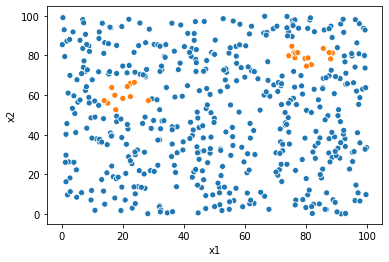

In [3]:
_ = sns.scatterplot('x1','x2', hue = 'y', data = df, legend=False)

In [4]:
# use sklearn to create train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33, stratify = df['y'])

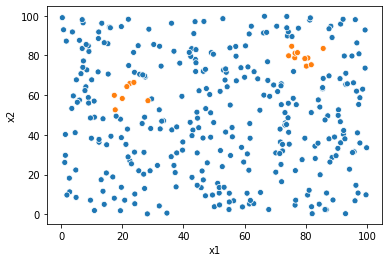

In [5]:
_ = sns.scatterplot('x1','x2', hue = y_train, data = X_train, legend=False)

In [6]:
# Need a more useful distance function to use inside the KNN function

def all_dist(x1, x2, data, labels):
    '''
    This function returns a dataframe with all needed information for the point (x1,x2). 
    It contains the distance to every point of the training set in the dist column of the dataframe, 
    and the label of all those points in the y column.
    '''
    
    data['y'] = labels
    
    distances = []
    
    for i in range(len(data)):
        res = np.sqrt((x1 - data.x1.iloc[i]) ** 2 + (x2 - data.x2.iloc[i]) ** 2)
        distances.append(res)
    
    data['dist'] = distances
    
    return data

In [7]:
def predict_KNN(X_train, y_train, X_test, k = 5):
    '''
    Returns a list with predictions for X_test
    '''
    y_pred = []
    
    for i in range(len(X_test)):
        data = all_dist(X_test.x1.iloc[i], X_test.x2.iloc[i], X_train, y_train)
        data.sort_values('dist', inplace=True)
        new_label = round(data.y.iloc[:k].mean())
        y_pred.append(new_label)
        
    return y_pred
        

In [8]:
y_pred = predict_KNN(X_train, y_train, X_test, k = 5)

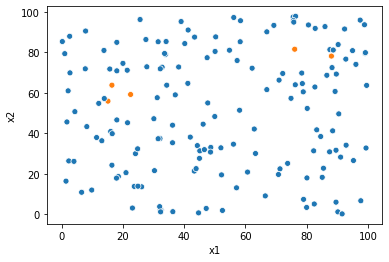

In [9]:
_ = sns.scatterplot('x1','x2', hue = y_pred, data = X_test, legend=False)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9818181818181818
0.7692307692307693


This is a very simple implementation of KNN. It could be expanded by adding the options for different distance metrics or adding weights to the points. Being able to use more than 2 features would also be useful. This version of KNN is also computationally inefficient, because this implementation explicitly calculates every single distance.